# Import Dependencies for Preprocessing and EDA


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Load DataSet 

In [2]:
df = pd.read_csv('Churn.csv')

# 7 Basic Questions 

In [3]:
# For showing all the columns
pd.set_option("display.max_columns" , None)

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4637,9470-YFUYI,Male,1,Yes,No,71,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),71.00,5012.1,No
789,0229-LFJAF,Male,0,No,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),69.65,4908.25,No
2526,5766-ZJYBB,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,19.4,Yes
6783,9867-XOBQA,Female,0,No,Yes,21,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,53.15,1183.2,No
2713,5996-DAOQL,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.corr(numeric_only = True)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


# Preprocessing

In [11]:
df.drop(columns = ['customerID'] , axis = 1 , inplace = True)

In [12]:
df.shape

(7043, 20)

In [13]:
len(df[df["TotalCharges"] == " "])

11

In [14]:
df["TotalCharges"]= df["TotalCharges"].replace({" ":"0.0"})

In [15]:
df["TotalCharges"]= df["TotalCharges"].astype(np.float64)

In [16]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2683,Female,0,No,No,7,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,79.65,604.7,Yes


# EDA

# Numerical Columns Univarient Analysis by Histogram and Box plot

In [17]:
def plot_hist(col, df):
    # Create A Figure 
    plt.figure(figsize=(4,3))
    sns.histplot(data = df , x =col  , kde= True)
    plt.title(f"Distribution of {col}")

    # Calculate the mean and median of each column 
    mean_col = df[col].mean()
    median_col = df[col].median()
    # Draw the mean and median line at the Plot 
    plt.axvline(mean_col , color= 'red' , linestyle='--' , label = "Mean")
    plt.axvline(median_col , color= 'green' , linestyle='-' , label = "Median")
    plt.show()

In [18]:
numerical_cols = ['SeniorCitizen' ,'tenure','MonthlyCharges','TotalCharges']
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

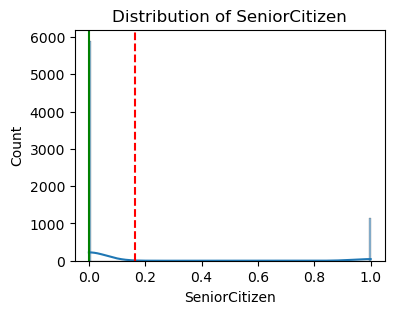

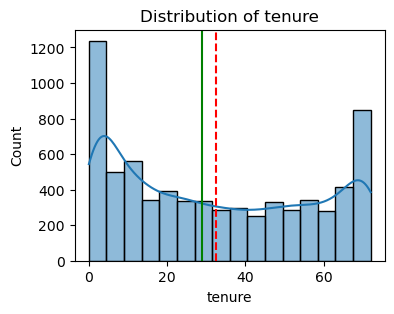

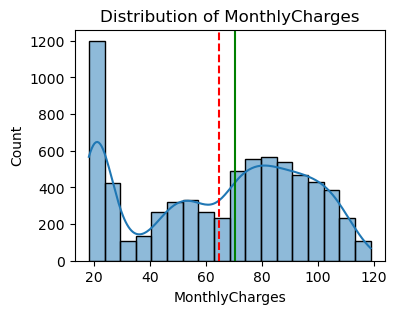

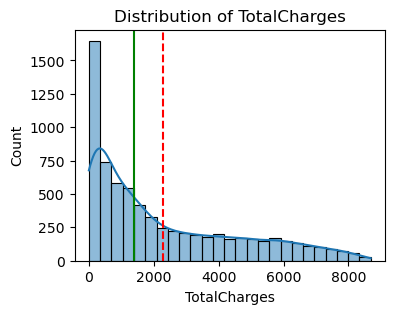

In [19]:
for col in numerical_cols:
    plot_hist(col , df)

- After Ploting Histograms It's my conculsion that the data is not in  noraml distribution 

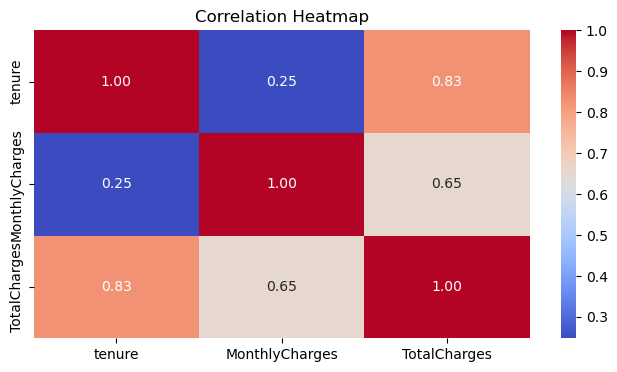

In [61]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

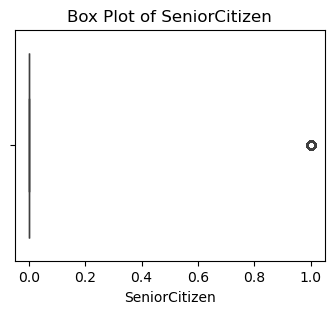

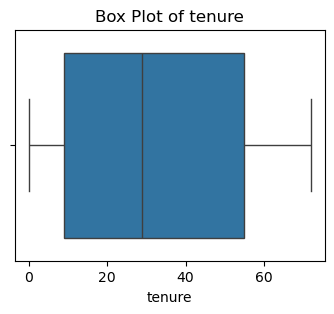

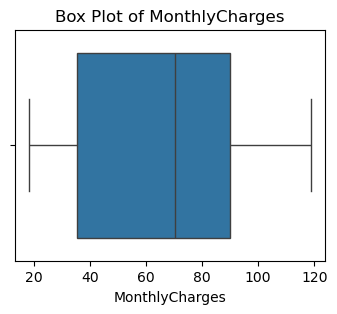

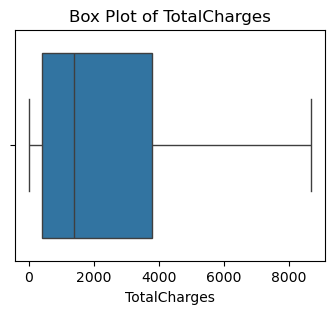

In [20]:
for col in numerical_cols:
    plt.figure(figsize = (4,3))
    plt.title(f"Box Plot of {col}")
    sns.boxplot(data = df , x = col)
    plt.show()

- After  ploting box plots I Analysis that there is not outliers inthe data 

# EDA at categorical Columns 

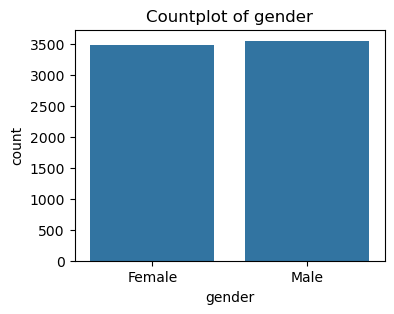

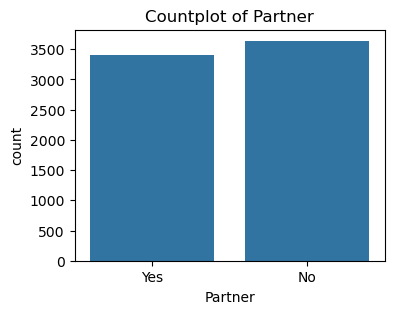

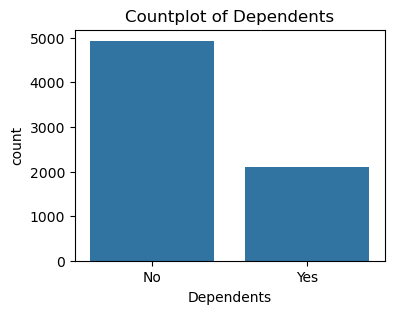

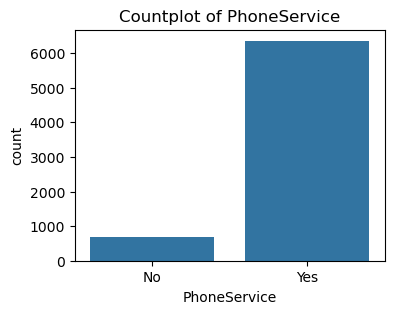

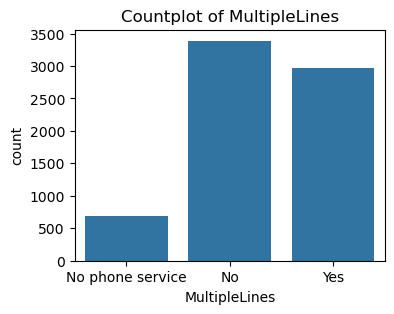

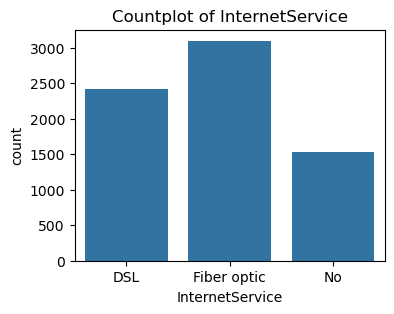

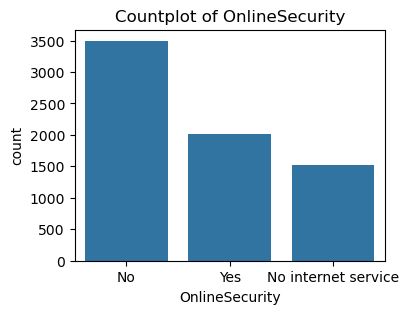

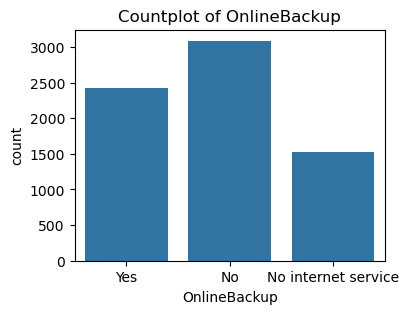

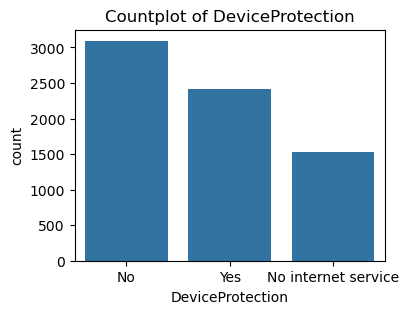

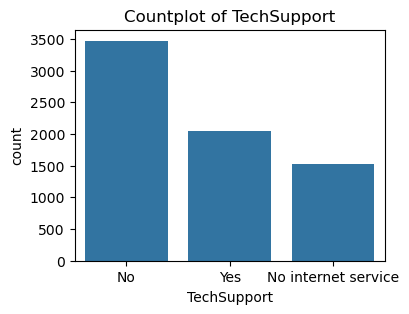

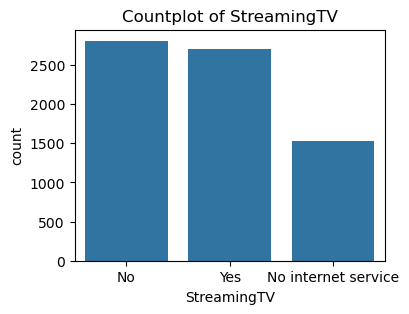

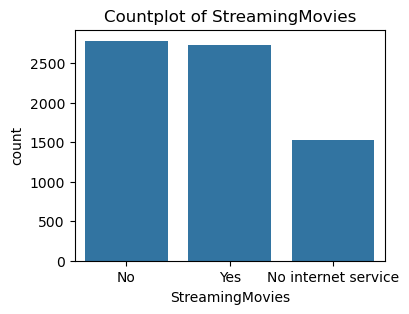

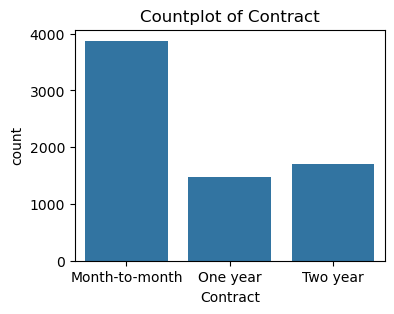

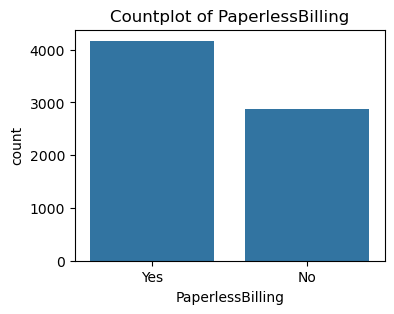

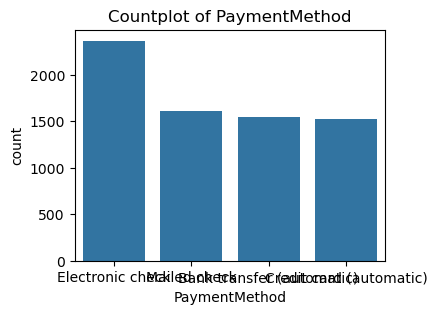

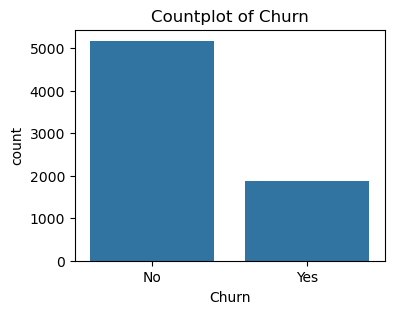

In [21]:
# Loop over categorical columns
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(4,3))
    plt.title(f"Countplot of {col}")
    sns.countplot(data=df, x=col)
    plt.show()

In [23]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5657,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,1691.90,No
2563,Male,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,105.95,2655.25,Yes
2111,Male,0,Yes,Yes,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,21.25,711.90,No
2418,Female,1,No,No,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2401.05,No
3818,Female,0,Yes,No,58,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.10,6393.65,No


In [26]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

# EnCode the churn and other categorical Cols 

In [49]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.compose import ColumnTransformer

In [30]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1254,Female,1,Yes,No,55,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),88.8,4805.3,No


In [32]:
X = df.drop(columns = ['Churn'] , axis = 1)
y = df['Churn']


(7043,)

In [34]:
# Encode the output COl 
le = LabelEncoder()
y = le.fit_transform(y)

In [41]:
# Encode the Catgorical cols in X

# Define categorical and numeric columns
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include="number").columns
processor = ColumnTransformer(
    transformers = [
        ('ohe', OneHotEncoder(drop = 'first' , sparse_output=False) , cat_cols),
        ('ss', StandardScaler() , num_cols)
    ] , 
    remainder = "passthrough"
)
X_preprocessed = processor.fit_transform(X)

In [42]:
X_train ,X_test , y_train , y_test = train_test_split(X_preprocessed , y , test_size = 0.2 , random_state = 42)

In [45]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Model Training 

In [47]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [53]:
models = {
    "Random Forest": RandomForestClassifier(random_state = 42),
    "Decision Tree" : DecisionTreeClassifier(random_state = 42)
}

In [54]:
cv_scores={}
for model_name , model in models.items():
    print(f"Model Training with {model_name}")
    scores = cross_val_score(model , X_train, y_train , cv= 5 , scoring = "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)    

Model Training with Random Forest
Random Forest cross-validation accuracy: 0.79
----------------------------------------------------------------------
Model Training with Decision Tree
Decision Tree cross-validation accuracy: 0.72
----------------------------------------------------------------------


In [55]:
rfc = RandomForestClassifier(random_state = 42)

In [56]:
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:", confusion_matrix(y_test, y_test_pred))
print("Classification Report:", classification_report(y_test, y_test_pred))

Accuracy Score: 0.7955997161107168
Confsuion Matrix: [[944  92]
 [196 177]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

